## Text Representation - Case Study

Online film reviews provide valuable information about public opinion, and their analysis can help to understand sentiment trends. In this case study, I will work with the IMDb reviews dataset, which contains 50,000 film reviews already labeled as positive or negative. The aim is to explore how textual data can be represented and visualised using two algorithms: <br/><br/>
TF-IDF and SentenceBERT, methods for exploring textual data and transforming them into numeric representations.

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [11]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

The dataset seems to be perfectly balanced and has no missing data-

In [14]:
df[df.duplicated(keep=False)].sort_values("review")

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative
...,...,...
47876,this movie sucks. did anyone notice that the e...,negative
44122,"well, the writing was very sloppy, the directi...",negative
23056,"well, the writing was very sloppy, the directi...",negative
10163,"when I first heard about this movie, I noticed...",positive


In [15]:
df[df.duplicated(keep=False)].count()

review       824
sentiment    824
dtype: int64

The only imperfection seems to be some duplicate reviews, not many, so we can remove them. Perhaps some records were duplicated to round up the 50,000 figure.

In [16]:
df1 = df.drop_duplicates()
df1.shape

(49582, 2)

### TF-IDF


TF-IDF (Term Frequency-Inverse Document Frequency): indicates the importance of a word in a text field with respect to a set of texts, but it misses the semantic meaning.

In [17]:
nltk.download("stopwords")
nltk_stopwords = set(stopwords.words("english"))

movie_stopwords = {"movie", "film", "actor", "director", "scene", "actors",
                    "actress", "act", "acting", "writer", "writing", "acted", "wrote"}

all_stopwords = list(nltk_stopwords.union(movie_stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
reviews = df["review"].tolist()
reviews_1000 = df["review"].iloc[:1000]
vectorizer = TfidfVectorizer(max_features=1000, stop_words=all_stopwords)
tfidf_matrix = vectorizer.fit_transform(reviews_1000)


Starting from TF-IDF, after reviewing the initial results, I decided to remove some stopwords from the reviews. They did not add much value to the analysis and occupied unnecessary memory space. To do this, I used English stopwords from the nltk library and added some handwritten words related to films that were not very important in the context. We can still see some irrelevant words in the output, but I did not want to cut too many, lest I miss something important in my representation.

Additionally, I had to reduce both the number of rows and columns due to computational constraints.

In [19]:
df1 = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df1

,10,100,20,80,able,absolutely,across,action,actual,actually,...,wrong,yeah,year,years,yes,yet,york,young,zombie,zombies
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.108835,0.0,0.0,0.00000,0.116829,0.000000,0.000000
3,0.094500,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.338381,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.087771,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.12571,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.137877,0.0,...,0.0,0.0,0.0,0.100457,0.0,0.0,0.00000,0.107835,0.000000,0.000000
996,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
997,0.000000,0.000000,0.000000,0.0,0.0,0.089077,0.0,0.085973,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.257996,0.136691
998,0.172799,0.000000,0.136123,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000


### SentenceBERT

SentenceBERT (SBERT): based on deep learning, generates dense vector representations of phrases, preserving better semantic relationships.

In [20]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [21]:
embeddings = model.encode(reviews_1000, batch_size=32)
embeddings

array([[ 0.03009933,  0.05041761, -0.07609468, ..., -0.01190238,
        -0.04635449, -0.02761648],
       [-0.01220195,  0.05196138, -0.01861   , ...,  0.01827122,
        -0.06013916,  0.01160098],
       [ 0.01425811, -0.0791384 ,  0.00033388, ..., -0.03055024,
        -0.00021407, -0.07959623],
       ...,
       [-0.07196961,  0.06293242, -0.06502309, ..., -0.03006248,
        -0.04739529, -0.01386884],
       [-0.05364797, -0.06440781, -0.00330625, ...,  0.01955764,
        -0.08864776, -0.01031677],
       [-0.01187272,  0.10050312,  0.03568934, ..., -0.02087015,
        -0.04434649,  0.06763393]], shape=(1000, 384), dtype=float32)

In [22]:
similarities = model.similarity(embeddings, embeddings)

Now that I have transformed the data, it is time to visualise it.

The purpose of PCA and T-SNE is to provide the most accurate two-dimensional representation of this type of data, which is not normally representable. Based on these results, we could apply machine learning models (e.g. nearest neighbour) to classify new reviews.

### PCA

PCA (Principal Component Analysis) helps to reduce the dimensionality of the data, preserving as much variance as possible.

In [23]:
pca = PCA(n_components=2)
sbert_pca = pca.fit_transform(embeddings) 

tfidf_pca = pca.fit_transform(tfidf_matrix) 

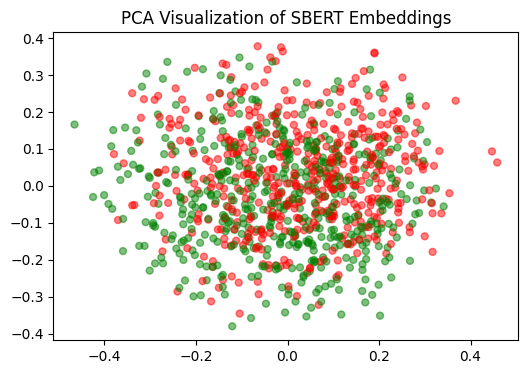

In [42]:
df_1000 = df.iloc[:1000] 
colors = df_1000["sentiment"].map({"positive": "green", "negative": "red"})

plt.figure(figsize=(6, 4))
plt.scatter(sbert_pca[:, 0], sbert_pca[:, 1], c=colors, alpha=0.5, s=25)
plt.title("PCA Visualization of SBERT Embeddings")
plt.show()

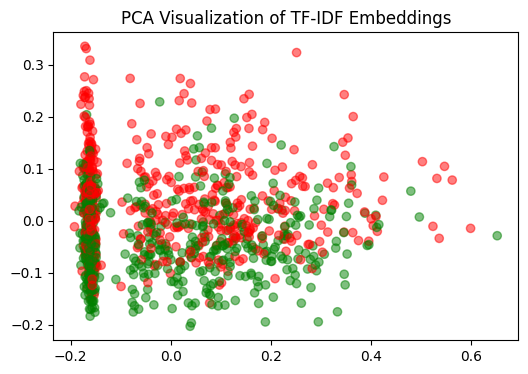

In [43]:
plt.figure(figsize=(6, 4))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], alpha=0.5, c=colors)
plt.title("PCA Visualization of TF-IDF Embeddings")
plt.show()

### T-SNE

T-SNE (t-distributed Stochastic Neighbor Embedding) is useful for observing clusters in high-dimensional data, but it can distort distances.

In [26]:
tsne = TSNE(n_components=2, random_state=42)

tfidf_dense = tfidf_matrix.toarray()

sbert_tsne = tsne.fit_transform(embeddings)
tfidf_tsne = tsne.fit_transform(tfidf_dense)

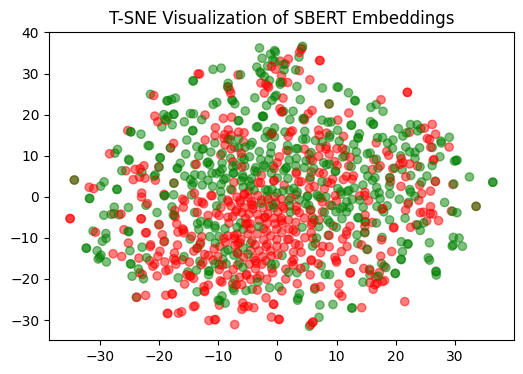

In [45]:
plt.figure(figsize=(6, 4))
plt.scatter(sbert_tsne[:, 0], sbert_tsne[:, 1], alpha=0.5, c=colors)
plt.title("T-SNE Visualization of SBERT Embeddings")
plt.show()

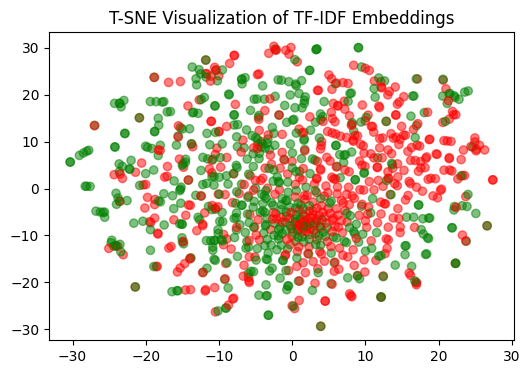

In [46]:
plt.figure(figsize=(6, 4))
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], alpha=0.5, c=colors)
plt.title("T-SNE Visualization of TF-IDF Embeddings")
plt.show()

L'analisi di sentiment basata su TF-IDF e SBERT, unita all'uso di PCA e t-SNE per la riduzione dimensionale, ha prodotto risultati soddisfacenti. La separazione tra sentiment positivi e negativi è stata ben visibile nei grafici, sebbene qualche sovrapposizione fosse presente. 
n particolare, l'analisi t-SNE ha messo in evidenza una distorsione più marcata delle recensioni negative rispetto a quelle positive. 